<a href="https://colab.research.google.com/github/janaeam/Shark_Attack_Data/blob/main/Shark_Attack_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Coding Dojo/Week_7/Data/GSAF5.xls' )

In [4]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2021.07.19,19-Jul-2021,2021.0,Unprovoked,AUSTRALIA,Western Australia,Rottnest Island,Surfing,male,M,NaN,"No injury, knocked off board by shark",N,12h30,"White shark, 3m","B. Myatt & S. De Marchi, GSAF",2021.07.19-Rottnest.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.19,2021.07.19,6668.0,NaN,NaN
1,2021.07.15,15-Jul-2021,2021.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Boogie boarding,male,M,11,Leg bitten,N,16h30,NaN,"K. McMurray, TrackingSharks.com",2021.07.15-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.15,2021.07.15,6667.0,NaN,NaN
2,2021.07.14,14-Jul-2021,2021.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Jeffrey's Bay,Surfing,male,M,38,Injuries to leg and torso,N,07h07,NaN,"J. Marchard & M. Michaelson, GSAF",2021.07.14-Jbay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.14,2021.07.14,6666.0,NaN,NaN
3,2021.07.11.R,Reported 11-Jul-2021,2021.0,Provoked,BAHAMAS,NaN,NaN,Jackass Team's publicity stunt for Discovery C...,Sean McInerney,M,NaN,Lacerations to right hand PROVOKED INCIDENT,N,NaN,NaN,"Yahoo.com, 7/11/2021",2021.07.11.R-McInerney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.11.R,2021.07.11.R,6665.0,NaN,NaN
4,2021.07.10.c,10-Jul-2021,2021.0,Unprovoked,USA,Florida,"Bathtub Beach, Martin County",Playing,Amiya Lobb-Smith,F,9,Right foot bitten,N,16h39,"Spinner shark, 4'?","J. Marchand, GSAF",2021.07.10.c-Lobb-Smith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.10.c,2021.07.10.c,6664.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25815 entries, 0 to 25814
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8793 non-null   object 
 1   Date                    6666 non-null   object 
 2   Year                    6665 non-null   float64
 3   Type                    6655 non-null   object 
 4   Country                 6617 non-null   object 
 5   Area                    6196 non-null   object 
 6   Location                6115 non-null   object 
 7   Activity                6104 non-null   object 
 8   Name                    6452 non-null   object 
 9   Sex                     6093 non-null   object 
 10  Age                     3744 non-null   object 
 11  Injury                  6635 non-null   object 
 12  Fatal (Y/N)             6115 non-null   object 
 13  Time                    3224 non-null   object 
 14  Species                 3669 non-null 

## df

- filter out empty columns and rows
- check for *NaN* values
- rename ***Case Number.1*** to ***Case Id*** to use as the index once EDA is completed and drop the remaining "Case" columns

In [6]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
# there are thousands of rows with no data I am going to delete those, but first
#    I need to find the end...
df[6665:6668]
# There 6,667 rows of active information

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6665,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6666,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN
6667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df[:6667]
df.tail(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6665,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6666,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


In [9]:
df.isnull().sum()

Case Number                  2
Date                         1
Year                         2
Type                        12
Country                     50
Area                       471
Location                   552
Activity                   563
Name                       215
Sex                        574
Age                       2923
Injury                      32
Fatal (Y/N)                552
Time                      3443
Species                   2998
Investigator or Source      18
pdf                          1
href formula                 4
href                         2
Case Number.1                1
Case Number.2                1
original order               0
Unnamed: 22               6666
Unnamed: 23               6665
dtype: int64

In [10]:
df.loc[df['Case Number'].isnull(), :]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
56,NaN,13-Jan-2021,2021.0,Unprovoked,BRAZIL,Pernambuco,Cacimba do Padre Beach,Surfing,Sergo Noronha,M,52,Puncture wounds to right hand,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.01.13.b-Noronha.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.01.13.b,2021.01.13.b,6612.0,NaN,NaN
5848,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,820.0,NaN,NaN


In [11]:
# filling in missing values for the Case Number column with values from the Case Number.1 column
df['Case Number'] = df['Case Number'].fillna(df['Case Number.1'])

In [12]:
df['Case Number'].isnull().sum()

0

In [13]:
# renaming the Case Number column to Case Id and the Sex and Species columns to eliminate the white space
df.rename(columns={'Case Number' : 'Case Id',
                   'Sex ' : 'Sex',
                   'Species ' : 'Species'}, inplace=True)

In [14]:
# dropping empty and redundant columns
df = df.drop(columns=(['Case Number.1', 'Case Number.2', 'Unnamed: 22', 'Unnamed: 23']))

## Sharks

- filtering out obvious irrelevant columns by renaming dataframe to ***sharks***, leaving the original ***df*** for reference.

- fix value errors for ***Country*** column by ensuring capitalization and spelling consistency.

- fix ***Area*** and ***Location*** columns by ensuring the proper value is associated with the appropriate column. Some of the values are mixed between columns. Also, correct missing values by calling *Unkown* or *Unspecified*

- analayze the value_counts() and fill *NaN* values of the ***Date*** and ***Year*** columns

- analyze the value_counts() and correct inconsistencies of the ***Species*** and ***Fatal(Y/N)*** column

In [15]:
# assigning new name to df so as to drop the obvious unnecessary columns
# leaving all other columns even if they are obviously unnecessary just in case they contain
#    valuable information for the data cleaning process
sharks = df.drop(columns=(['pdf', 'Name', 'href formula', 'href']))
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Id                 6667 non-null   object 
 1   Date                    6666 non-null   object 
 2   Year                    6665 non-null   float64
 3   Type                    6655 non-null   object 
 4   Country                 6617 non-null   object 
 5   Area                    6196 non-null   object 
 6   Location                6115 non-null   object 
 7   Activity                6104 non-null   object 
 8   Sex                     6093 non-null   object 
 9   Age                     3744 non-null   object 
 10  Injury                  6635 non-null   object 
 11  Fatal (Y/N)             6115 non-null   object 
 12  Time                    3224 non-null   object 
 13  Species                 3669 non-null   object 
 14  Investigator or Source  6649 non-null   

In [16]:
sharks.isnull().sum()

Case Id                      0
Date                         1
Year                         2
Type                        12
Country                     50
Area                       471
Location                   552
Activity                   563
Sex                        574
Age                       2923
Injury                      32
Fatal (Y/N)                552
Time                      3443
Species                   2998
Investigator or Source      18
original order               0
dtype: int64



> ## ['Type'] Columun



In [17]:
sharks['Type'].value_counts()

Unprovoked             4885
Provoked                607
Invalid                 552
Watercraft              349
Sea Disaster            240
Questionable             12
Boat                      7
Unverified                1
Unconfirmed               1
Under investigation       1
Name: Type, dtype: int64

In [18]:
# fixing cell value inconsistencies
sharks['Type'] = sharks['Type'].replace({'Unconfirmed' : 'Unverified',
                                         'Under investigation' : 'Unverified',
                                         'Questionable' : 'Unverified',
                                         'Boat' : 'Watercraft'}).fillna('Unverified')

In [19]:
sharks['Type'].value_counts()

Unprovoked      4885
Provoked         607
Invalid          552
Watercraft       356
Sea Disaster     240
Unverified        27
Name: Type, dtype: int64



> ## ['Country'] Column





*   correcting spelling issues in ***Country*** column
*   assigning values to another column with  country codes in order to plot a world map



In [20]:
sharks['Country'].nunique()

216

In [21]:
# fixing cell value inconsistencies, spelling and formatting issues
sharks['Country'] = sharks['Country'].replace({' PHILIPPINES' : 'PHILIPPINES',
                                               ' TONGA' : 'TONGA',
                                               'ASIA?' : 'ASIA',
                                               'ANDAMAN ISLANDS' : 'ANDAMAN AND NICOBAR ISLANDS',
                                               'ANDAMAN / NICOBAR ISLANDAS' : 'ANDAMAN AND NICOBAR ISLANDS',
                                               'BRITISH NEW GUINEA' : 'PAPUA NEW GUINEA',
                                               'Between PORTUGAL & INDIA' : 'ATLANTIC OCEAN',
                                               'CEYLON' : 'CEYLON (SRI LANKA)',
                                               'COLUMBIA' : 'COLOMBIA',
                                               'Coast of AFRICA' : 'SOUTH AFRICA',
                                               'EGYPT ' : 'EGYPT',
                                               'EGYPT / ISRAEL' : 'EGYPT',
                                               'EQUATORIAL GUINEA / CAMEROON' : 'NEW GUINEA',
                                               'GRAND CAYMAN' : 'CAYMAN ISLANDS',
                                               'INDIAN OCEAN?' : 'INDIAN OCEAN',
                                               'IRAN / IRAQ' : 'IRAN',
                                               'ITALY / CROATIA' : 'ITALY',
                                               'MALDIVE ISLANDS' : 'MALDIVES',
                                               'MEXICO ' : 'MEXICO',
                                               'MID ATLANTIC OCEAN' : 'ATLANTIC OCEAN',
                                               'MID-PACIFIC OCEAN' : 'PACIFIC OCEAN',
                                               'NICARAGUA ' : 'NICARAGUA',
                                               'NORTH ATLANTIC OCEAN ' : 'NORTH ATLANTIC OCEAN',
                                               'OCEAN' : 'OCEANIA',
                                               'PACIFIC OCEAN ' : 'PACIFIC OCEAN',
                                               'RED SEA / INDIAN OCEAN' : 'RED SEA',
                                               'RED SEA?' : 'RED SEA',
                                               'REUNION ISLAND' : 'REUNION',
                                               'SOLOMON ISLANDS / VANUATU' : 'SOLOMON ISLANDS',
                                               'SOUTH WEST PACIFIC OCEAN' : 'SOUTH PACIFIC OCEAN',
                                               'ST HELENA, British overseas territory' : 'ST HELENA',
                                               'ST KITTS / NEVIS' : 'ST KITTS',
                                               'ST MARTIN' : 'ST MAARTEN',
                                               'ST. MAARTIN' : 'ST MAARTEN',
                                               'ST. MARTIN' : 'ST MAARTEN',
                                               'SUDAN?' : 'SUDAN',
                                               'THE BALKANS' : 'BALKANS',
                                               'TRINIDAD & TOBAGO' : 'TOBAGO',
                                               'UNITED ARAB EMIRATES (UAE)' : 'UNITED ARAB EMIRATES',
                                               'BRITISH WEST INDIES' : 'WEST INDIES',
                                               'WESTERN SAMOA' : 'SAMOA',
                                               'Sierra Leone' : 'SIERRA LEONE',
                                               'Seychelles' : 'SEYCHELLES',
                                               'YEMEN ' : 'YEMEN'})

In [22]:
vc = sharks['Country'].value_counts()
vc.sort_index()[90:110]

MADAGASCAR               8
MALAYSIA                 5
MALDIVES                 3
MALTA                    5
MARSHALL ISLANDS        13
MARTINIQUE               3
MAURITIUS               10
MAYOTTE                  1
MEDITERRANEAN SEA        2
MEXICO                  96
MICRONESIA               3
MID-PACIFC OCEAN         1
MONACO                   1
MONTENEGRO               3
MOZAMBIQUE              46
NAMIBIA                  2
NETHERLANDS ANTILLES     1
NEVIS                    1
NEW BRITAIN              6
NEW CALEDONIA           62
Name: Country, dtype: int64

In [23]:
sharks['Country'].isna().sum()

50

In [24]:
sharks['Country'].nunique()

181

In [25]:
 sharks.loc[sharks['Country'].isna(), :].count()

Case Id                   50
Date                      50
Year                      50
Type                      50
Country                    0
Area                      15
Location                  11
Activity                  43
Sex                       46
Age                        9
Injury                    48
Fatal (Y/N)               45
Time                       7
Species                   12
Investigator or Source    50
original order            50
dtype: int64

In [26]:
sharks['Country'] = sharks['Country'].fillna('UNKNOWN')

In [27]:
sharks['Country'].isna().sum()

0

In [28]:
sharks['Country'].value_counts()

USA                 2409
AUSTRALIA           1425
SOUTH AFRICA         590
NEW ZEALAND          139
PAPUA NEW GUINEA     136
                    ... 
DJIBOUTI               1
GABON                  1
PARAGUAY               1
TASMAN SEA             1
COOK ISLANDS           1
Name: Country, Length: 182, dtype: int64



> ## ['Area'] and ['Location'] Columns

*   filling in some missing values or replacing incorrect values from the values in the adjacent column (either ***Area*** to ***Location*** or vice versa)
*   replacing mis-labeled values with  proper label
*   moving values from wrong column to the correct column







In [29]:
sharks.loc[sharks['Location']== 'Santa Cruz', 'Country'] = sharks.loc[sharks['Location']== 'Santa Cruz', 'Country'].fillna('USA')
sharks.loc[sharks['Location']== 'Santa Cruz', 'Area'] = sharks.loc[sharks['Location']== 'Santa Cruz', 'Area'].fillna('California')

In [30]:
sharks.loc[sharks['original order']== 496, :] = sharks.loc[sharks['original order']== 496, :].replace('Santa Cruz','Santa Cruz, Santa Cruz County')

In [31]:
sharks.loc[sharks['Area']=='English Channel', 'Country'] = sharks.loc[sharks['Area']=='English Channel', 'Country'].fillna('ENGLAND')
sharks.loc[sharks['Location']=='Between St. Kitts & Nevis', ['Country', 'Area']] = sharks.loc[sharks['Location']=='Between St. Kitts & Nevis', ['Country', 'Area']].fillna('ST KITTS').replace('Caribbean Sea', 'The Narrows')
sharks.loc[sharks['Location']=='Florida Strait', 'Country'] = sharks.loc[sharks['Location']=='Florida Strait', 'Country'].fillna('USA')
sharks.loc[sharks['Location']=='Florida Strait', 'Area'] = sharks.loc[sharks['Location']=='Florida Strait', 'Area'].fillna('Florida')

In [32]:
sharks.loc[sharks['Area']=='Between Timor & Darwin, Australia', 'Country'] = sharks.loc[sharks['Area']=='Between Timor & Darwin, Australia', 'Country'].fillna('AUSTRALIA')
sharks.loc[sharks['Area']=='Between Timor & Darwin, Australia', 'Location'] = sharks.loc[sharks['Area']=='Between Timor & Darwin, Australia', 'Location'].fillna('Darwin')

In [33]:
sharks.loc[sharks['Area']=='Caribbean Sea', 'Country'] = sharks.loc[sharks['Area']=='Caribbean Sea', 'Country'].fillna('CARIBBEAN SEA')
sharks.loc[sharks['Area']=='Near the Andaman & Nicobar Islands', 'Country'] = sharks.loc[sharks['Area']=='Near the Andaman & Nicobar Islands', 'Country'].fillna('ANDAMAN AND NICOBAR ISLANDS')
sharks.loc[sharks['Area']=='Caribbean Sea', 'Country'] = sharks.loc[sharks['Area']=='Caribbean Sea', 'Country'].fillna('CARIBBEAN SEA')
sharks.loc[sharks['Area']=='Between Comores & Madagascar', 'Country'] = sharks.loc[sharks['Area']=='Between Comores & Madagascar', 'Country'].fillna('COMOROS')

In [34]:
sharks.loc[sharks['Location']=='225 miles east of Hong Kong', 'Country'] = sharks.loc[sharks['Location']=='225 miles east of Hong Kong', 'Country'].fillna('CHINA')
sharks.loc[sharks['Location']=='225 miles east of Hong Kong', 'Area'] = sharks.loc[sharks['Location']=='225 miles east of Hong Kong', 'Area'].fillna('Hong Kong')
sharks.loc[sharks['Area']== 'New Territories', :] = sharks.loc[sharks['Area']== 'New Territories', :].replace({'HONG KONG':'CHINA', 'New Territories':'Hong Kong'})
sharks.loc[sharks['Area']== 'Mirs Bay ', ['Area','Location', 'Country']] = sharks.loc[sharks['Area']== 'Mirs Bay ', ['Area','Location', 'Country']].replace({'HONG KONG':'CHINA','Mirs Bay ':'Hong Kong'}).fillna('Mirs Bay')
sharks.loc[sharks['Area']=='Ho Ha Wan Marine Park', 'Location'] = sharks.loc[sharks['Area']=='Ho Ha Wan Marine Park', 'Location'].fillna('Ho Ha Wan Marine Park')
sharks.loc[sharks['Area']=='South China Sea 200 miles from Hong Kong', 'Location'] = sharks.loc[sharks['Area']=='South China Sea 200 miles from Hong Kong', 'Location'].fillna('South China Sea 200 miles from Hong Kong')
# Hong Kong is not a country. Correcting Country and Area columns to reflect accurate entry
sharks.loc[sharks['Country']=='HONG KONG', 'Area'] = sharks.loc[sharks['Country']=='HONG KONG', 'Area'].fillna('Hong Kong')
sharks.loc[sharks['Country']=='HONG KONG', ['Country', 'Area', 
                                            'Location']] = sharks.loc[sharks['Country']=='HONG KONG', ['Country', 'Area', 
                                                                                                       'Location']].replace({'HONG KONG':'CHINA',
                                                                                                       'Clearwater Bay':'Hong Kong',
                                                                                                       'On the Kowloon penisula, south of Sai Kung':'Hong Kong',
                                                                                                       'Kowloon Peninsula':'Hong Kong',
                                                                                                       'Port Shelter':'Hong Kong',
                                                                                                       'Ho Ha Wan Marine Park': 'Hong Kong',
                                                                                                       'South China Sea 200 miles from Hong Kong':'Hong Kong',
                                                                                                       'First Beach':'Clearwater Bay First Beach',
                                                                                                       'Silverstrand':'Kowloon Peninsula, South of Sai Kung, Silverstrand',
                                                                                                       'Sai Kung':'Kowloon Peninsula, Sai Kung',
                                                                                                       'Silverstand Beach, near Hung Hau':'Port Shelter, Silverstrand Beach, near Hung Hau',
                                                                                                       })
                 

In [35]:
sharks.loc[sharks['Country']=='CHINA', 'Area'] = sharks.loc[sharks['Country']=='CHINA', 'Area'].fillna('Macao')
sharks.loc[sharks['Location']=='Macao Harbor', 'Fatal (Y/N)'] = sharks.loc[sharks['Location']=='Macao Harbor', 'Fatal (Y/N)'].fillna('N')

In [36]:
sharks.loc[sharks['Location']=='In a river feeding into the Bay of Bengal', 'Country'] = sharks.loc[sharks['Location']=='In a river feeding into the Bay of Bengal', 'Country'].fillna('INDIA')
sharks.loc[sharks['Location']=='In a river feeding into the Bay of Bengal', 'Area'] = sharks.loc[sharks['Location']=='In a river feeding into the Bay of Bengal', 'Area'].fillna('Bay of Bengal')

In [37]:
sharks.loc[sharks['Area']=='Ionian Sea', 'Country'] = sharks.loc[sharks['Area']=='Ionian Sea', 'Country'].fillna('GREECE')

In [38]:
sharks.loc[sharks['Area']=='St Helena', 'Country'] = sharks.loc[sharks['Area']=='St Helena', 'Country'].fillna('SOUTH ATLANTIC OCEAN')

In [39]:
sharks.loc[sharks['Location']=='Carlisle Bay', 'Country'] = sharks.loc[sharks['Location']=='Carlisle Bay', 'Country'].fillna('ANTIGUA')


In [40]:
sharks.loc[sharks['Area']=='Western Banks', 'Country'] = sharks.loc[sharks['Area']=='Western Banks', 'Country'].fillna('USA')
sharks.loc[sharks['Area']=='Western Banks', ['Area', 'Location']] = sharks.loc[sharks['Area']=='Western Banks', ['Area', 'Location']].replace('Western Banks','Maine').fillna('Western Banks')
sharks.loc[sharks['Area']=='Gulf of California', 'Country'] = sharks.loc[sharks['Area']=='Gulf of California', 'Country'].fillna('MEXICO')
sharks.loc[sharks['Area']=='Mediterranean Sea', 'Country'] = sharks.loc[sharks['Area']=='Mediterranean Sea', 'Country'].fillna('MEDITERRANEAN SEA')
sharks.loc[sharks['Location']=='Île Saint-Paul', ['Country', 'Area']] = sharks.loc[sharks['Location']=='Île Saint-Paul', ['Country', 'Area']].fillna('CANADA').replace('French Southern Territories','Nova Scotia')


In [41]:
sharks.loc[sharks['Area']=='300 miles east of St. Thomas (Virgin Islands)', 'Country'] = sharks.loc[sharks['Area']=='300 miles east of St. Thomas (Virgin Islands)', 'Country'].fillna('NORTH ATLANTIC OCEAN')

In [42]:
sharks.loc[sharks.index == 5062, 'Location'] = sharks.loc[sharks.index == 5062, 'Location'].fillna(sharks['Area'])
sharks.loc[sharks.index == 5062, 'Area'] = sharks.loc[sharks.index == 5062, 'Area'].replace('04.05N-13.23W', np.nan)
sharks.loc[sharks.index == 4287, 'Area'] = sharks.loc[sharks.index == 4287, 'Area'].replace('9.35N 79.35W', 'East of La Grande Island, North of Panama Canal')
sharks.loc[sharks.index == 4287, 'Location'] = sharks.loc[sharks.index == 4287, 'Location'].replace('East of La Grande Island, North of Panama Canal','9.35N 79.35W')

In [43]:
sharks.loc[sharks['Country'].str.contains('OCEAN'), :].head(2)

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
794,2015.02.15,15-Feb-2015,2015.0,Watercraft,ATLANTIC OCEAN,NaN,NaN,Transatlantic Rowing,NaN,NaN,"No injury, shark bit rudder",N,NaN,White shark,"Yorkshire Post, 3/16/2014",5874.0
1855,2006.01.28.R,Reported 28-Jan-2006,2006.0,Watercraft,ATLANTIC OCEAN,300 miles from Antigua,NaN,Competing in the Woodvale Atlantic Rowing Race,M,46 & 34,No injury to occupants; shark rammed boat repe...,N,NaN,12' shark,"N. Bevan, icwales.icnetwork.co.uk, 1/28/2006",4813.0


In [44]:
sharks.loc[sharks['Country'].str.contains('OCEAN'), ['Area', 'Location']] = sharks.loc[sharks['Country'].str.contains('OCEAN'), ['Area', 'Location']].fillna('Open Sea')

In [45]:
sharks[['Area', 'Location']].isna().sum()

Area        419
Location    490
dtype: int64



> ## ['Fatal'] Column



In [46]:
# renaming Fatal column (removing (Y/N) from title)
sharks = sharks.rename(columns=({'Fatal (Y/N)' : 'Fatal'}))
# filling in missing values with UnV (Unverified)
sharks['Fatal'] = sharks['Fatal'].fillna('UnV')

In [47]:
sharks.isnull().sum()

Case Id                      0
Date                         1
Year                         2
Type                         0
Country                      0
Area                       419
Location                   490
Activity                   563
Sex                        574
Age                       2923
Injury                      32
Fatal                        0
Time                      3443
Species                   2998
Investigator or Source      18
original order               0
dtype: int64

> ## ['Date'] & ['Year'] Columns

- many formatting issues. Values are mostly represented, but format is inconsistent.
- correcting ***Date*** and ***Year*** column dytpes
- all imputed dates/years values were derived from the following methods (in order of importance): 
- 1.   deduced from the date or year mentioned in the original non-descript cell value
- 2.   the given date/year from another column (if mentioned)
- 3.   by finding the median value from a range of years or dates provided

In [48]:
sharks.loc[sharks['Date'].isnull(), :]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order
6544,ND-0157,NaN,0.0,Unprovoked,BELIZE,NaN,NaN,NaN,M,NaN,NaN,N,NaN,NaN,"D. Grant, SRI",124.0


In [49]:
# dropping row containing NaN in the Date column as most of the information is unknown
sharks.dropna(subset= ['Date'], inplace=True)

In [50]:
# unmixing the dtype for the Date column. It's currently a mixed dtype and impossible to correct 
#    messy formatting. Using .replace or .str.replace with current mixed dtype causes 150 NaNs
# found code at on this website: https://stackoverflow.com/questions/33312706/pandas-convert-mixed-types-to-string
sharks['Date'] = sharks['Date'].apply(lambda elt: str(int(elt)) if isinstance(elt, float) else str(elt))

In [51]:
sharks['Date'].dtypes

dtype('O')

In [52]:
sharks['Date'].value_counts()

1957                    11
1942                     9
1956                     8
1950                     7
1958                     7
                        ..
Reported 11-Jan-1921     1
06-Aug-2004              1
Before 1917              1
29-Sep-2003              1
05-Jan-1949              1
Name: Date, Length: 5736, dtype: int64

In [53]:
sharks['Date'].str.contains('Reported').sum()

564

In [54]:
sharks['Date'] = sharks['Date'].str.replace('Reported', '')

In [55]:
sharks['Date'].str.contains('Reported').sum()

0

In [56]:
sharks['Date'].isnull().sum()

0

In [57]:
sharks.shape

(6666, 16)

In [58]:
sharks['Date'].str.contains('1018').sum()

1

In [59]:
Nodate = sharks.loc[sharks['Date'].str.contains('No date'), :]
Nodate.head()

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order
6574,ND.0110,"No date, late 1960s",0.0,Unprovoked,VENEZUELA,Los Roques Islands,NaN,Spearfishing,M,NaN,"FATAL (x3), one survived with minor injuries",Y,NaN,said to involve 2.5 m hammerhead sharks,http://waterco.com.br/ataque_tubarao.htm,94.0
6580,ND.0102,"No date, Before 1963",0.0,Unprovoked,BAHREIN,NaN,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,Tiger shark,A.C. Doyle,88.0
6582,ND.0097,No date,0.0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,M,NaN,Hand bitten,N,NaN,NaN,Internet,86.0
6583,ND.0096,No date,0.0,Unprovoked,REUNION,Grand'Anse,Petite-île,yachtsman in a zodiac,M,NaN,Survived,N,NaN,NaN,G. Van Grevelynghe,85.0
6585,ND.0094,"No date, Before May-1996",0.0,Unprovoked,KOREA,South Korea,Cheju Island,Diving,F,NaN,"FATAL, injured while diving, then shark bit her",Y,NaN,NaN,"K. Amsler, Divernet.com",83.0


In [60]:
sharks['Date'] = sharks['Date'].str.replace('No date, ', ' ')
sharks['Date'] = sharks['Date'].str.replace('No date', ' ')

In [61]:
sharks.loc[sharks['Date'].str.contains('No date'), :]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order


In [62]:
sharks.loc[sharks.index==6655, :]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order
6655,ND.0012,Before 19-Jul-1913,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,M,NaN,"FATAL, leg stripped of flesh",Y,NaN,NaN,"Rural New Yorker, 7/19/1913",13.0


In [63]:
# changing value in Date column by index number for convenience

# found date in the Investigator column
sharks.loc[sharks.index == 6645, 'Date'] = '11-Jan-1940'
sharks.loc[sharks.index == 6645, 'Year'] = 1940
sharks.loc[sharks.index == 6602, 'Date'] = '1958'
sharks.loc[sharks.index == 6602, 'Year'] = 1958
sharks.loc[sharks.index == 6626, 'Date'] = '28-Jun-1950'
sharks.loc[sharks.index == 6626, 'Year'] = 1950
sharks.loc[sharks.index == 6621, 'Date'] = '15-Feb-1956'
sharks.loc[sharks.index == 6621, 'Year'] = 1956
sharks.loc[sharks.index == 6614, 'Date'] = '1956'
sharks.loc[sharks.index == 6614, 'Year'] = 1956
sharks.loc[sharks.index == 6609, 'Date'] = '22-Aug-1960'
sharks.loc[sharks.index == 6609, 'Year'] = 1960
sharks.loc[sharks.index == 6600, 'Date'] = '1952'
sharks.loc[sharks.index == 6600, 'Year'] = 1952
sharks.loc[sharks.index == 6572, 'Date'] = '27-Mar-1911'
sharks.loc[sharks.index == 6572, 'Year'] = 1911
sharks.loc[sharks.index == 6569, 'Date'] = '11-Jan-1936'
sharks.loc[sharks.index == 6569, 'Year'] = 1936
sharks.loc[sharks.index == 6564, 'Date'] = '09-Jul-2011'
sharks.loc[sharks.index == 6564, 'Year'] = 2011
sharks.loc[sharks.index == 4685, 'Date'] = '19-Aug-1954'
sharks.loc[sharks.index == 4685, 'Year'] = 1954
sharks.loc[sharks.index == 6558, 'Date'] = '22-Jul-1916'
sharks.loc[sharks.index == 6558, 'Year'] = 1916
sharks.loc[sharks.index == 6556, 'Date'] = '28-Jan-1909'
sharks.loc[sharks.index == 6556, 'Year'] = 1909
sharks.loc[sharks.index == 6554, 'Date'] = '2-Jun-1933'
sharks.loc[sharks.index == 6554, 'Year'] = 1933
sharks.loc[sharks.index == 4909, 'Date'] = '20-Feb-1948'
sharks.loc[sharks.index == 6263, 'Date'] = '1-Nov-1872'
sharks.loc[sharks.index == 6100, 'Date'] = '23-Dec-1887'
sharks.loc[sharks.index == 6487, 'Year'] = 1906
sharks.loc[sharks.index == 4479, 'Date'] = '29-Jan-1960'

# imputing date by original values from the date column
sharks.loc[sharks.index==6654, 'Date'] = '18-Jul-1913'
sharks.loc[sharks.index==6654, 'Year'] = 1913 
sharks.loc[sharks.index==6655, 'Date'] = '15-Jul-1913'
sharks.loc[sharks.index==6655, 'Year'] = 1913
sharks.loc[sharks.index==4717, 'Date'] = '1954'
sharks.loc[sharks.index==4717, 'Year'] = 1954
sharks.loc[sharks.index==4716, 'Date'] = '1954'
sharks.loc[sharks.index==4716, 'Year'] = 1954
sharks.loc[sharks.index == 6240, 'Date'] = '1875'
sharks.loc[sharks.index == 6384, 'Date'] = '22-Jan_1852'
sharks.loc[sharks.index == 6601, 'Date'] = '1931' # median of range entered
sharks.loc[sharks.index == 6639, 'Date'] = '1935'
sharks.loc[sharks.index == 6287, 'Date'] = '24-Oct-1868'
sharks.loc[sharks.index == 6255, 'Date'] = '15-Nov-1873' # median of range entered
sharks.loc[sharks.index == 6146, 'Date'] = '14-Sep-1883'
sharks.loc[sharks.index == 5773, 'Date'] = '16-Nov-1909' # median of range entered
sharks.loc[sharks.index == 5635, 'Date'] = '1919'
sharks.loc[sharks.index == 5528, 'Date'] = '17-Mar-1925' # median of range entered
sharks.loc[sharks.index == 5476, 'Date'] = '15-Jan-1928' # median of range entered
sharks.loc[sharks.index == 5065, 'Date'] = '13-Sep-1942' # median of range entered
sharks.loc[sharks.index == 5042, 'Date'] = '05-Mar-1943' # median of range entered
sharks.loc[sharks.index == 5019, 'Date'] = '1-Aug-1944' # median of range entered
sharks.loc[sharks.index == 4991, 'Date'] = '20-Dec-1944' # median of range entered
sharks.loc[sharks.index == 4877, 'Date'] = '1-Apr-1949' # median of range entered
sharks.loc[sharks.index == 4799, 'Date'] = '4-Aug-1951' # median of range entered
sharks.loc[sharks.index == 4478, 'Date'] = '1-Aug-1959' # median of range entered
sharks.loc[sharks.index == 4418, 'Date'] = '11-Sep-1959' # median of range entered
sharks.loc[sharks.index == 3883, 'Date'] = '30-May-1967' #  of range entered
sharks.loc[sharks.index == 3204, 'Date'] = '15-Jul-1985' # chose earlier year
sharks.loc[sharks.index == 2863, 'Date'] = '1-Aug-1993' # median of range entered
sharks.loc[sharks.index == 2004, 'Date'] = '19-Jul-2004' # median of range entered
sharks.loc[sharks.index == 6636, 'Date'] = '1942' # imputing be World War II value entered
sharks.loc[sharks.index == 6637, 'Date'] = '1942' # imputing be World War II value entered


# found date in the Year column
sharks.loc[sharks.index == 349, 'Date'] = 'Jun-2018'
sharks.loc[sharks.index == 6468, 'Date'] = '1825'
sharks.loc[sharks.index == 6526, 'Date'] = '1642'
sharks.loc[sharks.index == 5162, 'Date'] = '1939'


In [64]:
# replacing typo in Date column by Case Id so as to avoid changing all dates that 
#    match the value being changed
sharks.loc[sharks['Case Id']=='2020.07.10', :] = sharks.loc[sharks['Case Id']=='2020.07.10', :].replace('10-Jul-202', '10-Jul-2020')

In [65]:
# imputing dates and years to be 1 year or 15 days prior to referenced "Before" date
# filling in Year column if missing
sharks['Date'] = sharks['Date'].str.replace('Before 1824', '1823')
sharks['Date'] = sharks['Date'].str.replace('Before 1871', '1870')
sharks['Date'] = sharks['Date'].str.replace('Before 1876', '1875')
sharks['Date'] = sharks['Date'].str.replace('Before 1878', '1877')
sharks['Date'] = sharks['Date'].str.replace('Before 1900', '1899')
sharks['Date'] = sharks['Date'].str.replace('Before 1901', '1900')
sharks['Date'] = sharks['Date'].str.replace('Before 1902', '1901')
sharks['Date'] = sharks['Date'].str.replace('Before 1903', '1902')
sharks['Date'] = sharks['Date'].str.replace('Before 1905', '1904')
sharks['Date'] = sharks['Date'].str.replace('Before 1906', '1905')
sharks['Date'] = sharks['Date'].str.replace('Before 1908', '1907')
sharks['Date'] = sharks['Date'].str.replace('Before 1911', '1910')
sharks['Date'] = sharks['Date'].str.replace('Before 17-Jul-1916', '02-Jul-1916')
sharks['Date'] = sharks['Date'].str.replace('Before 1917', '1916')
sharks['Date'] = sharks['Date'].str.replace('Before 1921', '1920')
sharks['Date'] = sharks['Date'].str.replace('Before 1927', '1926')
sharks['Date'] = sharks['Date'].str.replace('Before 1934', '1933')
sharks['Date'] = sharks['Date'].str.replace('Before 1939', '1938')
sharks['Date'] = sharks['Date'].str.replace('Before 1952', '1951')
sharks['Date'] = sharks['Date'].str.replace('Before Mar-1956', '15-Feb-1956')
sharks['Date'] = sharks['Date'].str.replace('Before 1956', '1955')
sharks['Date'] = sharks['Date'].str.replace('Before 1957', '1956')
sharks['Date'] = sharks['Date'].str.replace('Before 1958', '1957')
sharks['Date'] = sharks['Date'].str.replace('Before  1958', '1957')
sharks['Date'] = sharks['Date'].str.replace('Before  24 Apr-1959', '09-Apr-1959')
sharks['Date'] = sharks['Date'].str.replace('Before  19-Jun-1959', '04-Jun-1959')
sharks['Date'] = sharks['Date'].str.replace('Before 1961', '1960')
sharks['Date'] = sharks['Date'].str.replace('Before 1962', '1961')
sharks['Date'] = sharks['Date'].str.replace('Before 1963', '1962')
sharks['Date'] = sharks['Date'].str.replace('Before 8-May-1965', '23-Apr-1965')
sharks['Date'] = sharks['Date'].str.replace('Before 3-Jan-1967', '19-Dec-1966')
sharks['Date'] = sharks['Date'].str.replace('Before 1969', '1968')
sharks['Date'] = sharks['Date'].str.replace(' Before 1975', '1974')
sharks['Date'] = sharks['Date'].str.replace(' Before  1975', '1974')
sharks['Date'] = sharks['Date'].str.replace('Before 1987', '1986')
sharks['Date'] = sharks['Date'].str.replace('Before Aug-1987', '16-Jul-1987')
sharks['Date'] = sharks['Date'].str.replace('Before Aug-1989', '16-Jul-1989')
sharks['Date'] = sharks['Date'].str.replace('Before 1994', '1993')
sharks['Date'] = sharks['Date'].str.replace('Beforer 1994', '1993')
sharks['Date'] = sharks['Date'].str.replace('Before 1996', '1995')
sharks['Date'] = sharks['Date'].str.replace('Before Mar-1995', '14-Feb-1995')
sharks['Date'] = sharks['Date'].str.replace('Before May-1996', '15-May-1996')
sharks['Date'] = sharks['Date'].str.replace('Before Feb-1998', '16-Feb-1998')
sharks['Date'] = sharks['Date'].str.replace('Before 2003', '2002')
sharks['Date'] = sharks['Date'].str.replace('Before 2004', '2003')
sharks['Date'] = sharks['Date'].str.replace('Before 2006', '2005')
sharks['Date'] = sharks['Date'].str.replace('Before 2009', '2008')
sharks['Date'] = sharks['Date'].str.replace('Before Oct-2009', '15-Sep-2009')
sharks['Date'] = sharks['Date'].str.replace('Before 2011', '2010')
sharks['Date'] = sharks['Date'].str.replace('Before 2012', '2011')
sharks['Date'] = sharks['Date'].str.replace('Before 08-Jun-1912', '24-Feb-1912')
sharks['Date'] = sharks['Date'].str.replace('Before 2016', '2015')


In [66]:
sharks['Date'] = sharks['Date'].str.replace('s', '')

In [67]:
# stripping white space from cell values... I would've used this above instead of .str.replace, but
#    I was unaware of this option and the dtype was mixed. I did not learn how to correct this issue
#    until I started correcting the values of the Age column
sharks['Date'] = sharks['Date'].map(lambda x: x.strip(' Early Late late During the Seige of Ladysmith () II ? `soon after close of Spanish American war War mid- " summer Last in Hong Kong'))

In [68]:
sharks.loc[sharks['Date'].str.contains('')==True, :]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order
0,2021.07.19,19-Jul-2021,2021.0,Unprovoked,AUSTRALIA,Western Australia,Rottnest Island,Surfing,M,NaN,"No injury, knocked off board by shark",N,12h30,"White shark, 3m","B. Myatt & S. De Marchi, GSAF",6668.0
1,2021.07.15,15-Jul-2021,2021.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Boogie boarding,M,11,Leg bitten,N,16h30,NaN,"K. McMurray, TrackingSharks.com",6667.0
2,2021.07.14,14-Jul-2021,2021.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Jeffrey's Bay,Surfing,M,38,Injuries to leg and torso,N,07h07,NaN,"J. Marchard & M. Michaelson, GSAF",6666.0
3,2021.07.11.R,11-Jul-2021,2021.0,Provoked,BAHAMAS,NaN,NaN,Jackass Team's publicity stunt for Discovery C...,M,NaN,Lacerations to right hand PROVOKED INCIDENT,N,NaN,NaN,"Yahoo.com, 7/11/2021",6665.0
4,2021.07.10.c,10-Jul-2021,2021.0,Unprovoked,USA,Florida,"Bathtub Beach, Martin County",Playing,F,9,Right foot bitten,N,16h39,"Spinner shark, 4'?","J. Marchand, GSAF",6664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,ND.0005,1902,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",6.0
6663,ND.0004,1902,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",5.0
6664,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",4.0
6665,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",3.0


In [69]:
sharks['Date'] = sharks['Date'].str.replace('1920 -1923', '1921')
sharks['Date'] = sharks['Date'].str.replace('1940 - 1950', '1945')
sharks['Date'] = sharks['Date'].str.replace('1853 or 1854', '1853')
sharks['Date'] = sharks['Date'].str.replace('1950 - 1951', '1950')
sharks['Date'] = sharks['Date'].str.replace('1990 or 1991', '1991')
sharks['Date'] = sharks['Date'].str.replace('Between 1918 & 1939', '1928')
sharks['Date'] = sharks['Date'].str.replace('be 1941-1945, more likely 1945', '1945')
sharks['Date'] = sharks['Date'].str.replace('Ca. ', '')
sharks['Date'] = sharks['Date'].str.replace('Ca . ', '')
sharks['Date'] = sharks['Date'].str.replace('Circa', '')
sharks['Date'] = sharks['Date'].str.replace('Circa ', '')
sharks['Date'] = sharks['Date'].str.replace('A.D.', '')
sharks['Date'] = sharks['Date'].str.replace('Reprtd ', '')
sharks['Date'] = sharks['Date'].str.replace('Reprted', '')
sharks['Date'] = sharks['Date'].str.replace('Reportd ', '')
sharks['Date'] = sharks['Date'].str.replace('05 ', '05-')
sharks['Date'] = sharks['Date'].str.replace('17 ', '17-')
sharks['Date'] = sharks['Date'].str.replace('26 ', '26-')
sharks['Date'] = sharks['Date'].str.replace('24-1806', '24-Apr-1806')
sharks['Date'] = sharks['Date'].str.replace('Mid ', '15-')
sharks['Date'] = sharks['Date'].str.replace('Mid-', '15-')
sharks['Date'] = sharks['Date'].str.replace('336.B.C..', '336 B.C.')
sharks['Date'] = sharks['Date'].str.replace('1010  BC', '1010 B.C.')
sharks['Date'] = sharks['Date'].str.replace('190Feb-2010', '10-Feb-2010')
sharks['Date'] = sharks['Date'].str.replace('19-Jul-2007.b', '19-Jul-2007')
sharks['Date'] = sharks['Date'].str.replace('26-Jul-1975.b', '26-Jul-1975')
sharks['Date'] = sharks['Date'].str.replace('02-Ap-2001', '02-Apr-2001')
sharks['Date'] = sharks['Date'].str.replace('22-Jul-144', '22-Jul-1944')
sharks['Date'] = sharks['Date'].str.replace('26-Sep-t937', '26-Sep-1937')
sharks['Date'] = sharks['Date'].str.replace('08-Ap-1936', '08-Apr-1936')
sharks['Date'] = sharks['Date'].str.replace('23-Decp1896', '23-Dec-1896')

sharks['Date'] = sharks['Date'].str.replace('21764', '02-Aug-1959')
sharks['Date'] = sharks['Date'].str.replace('1836.00.', '1836')



sharks['Date'] = sharks['Date'].str.replace('January ', 'Jan-')
sharks['Date'] = sharks['Date'].str.replace('Jan ', 'Jan-')
sharks['Date'] = sharks['Date'].str.replace('Jan-Jun', '15-Mar')
sharks['Date'] = sharks['Date'].str.replace('Feb ', 'Feb-')
sharks['Date'] = sharks['Date'].str.replace('March', 'Mar')
sharks['Date'] = sharks['Date'].str.replace('April ', 'Apr-')
sharks['Date'] = sharks['Date'].str.replace('May ', 'May-')
sharks['Date'] = sharks['Date'].str.replace('May-Jun', '15-May')
sharks['Date'] = sharks['Date'].str.replace('June ', 'Jun-')
sharks['Date'] = sharks['Date'].str.replace('July ', 'Jul-')
sharks['Date'] = sharks['Date'].str.replace('Jul ', 'Jul-')
sharks['Date'] = sharks['Date'].str.replace('August ', 'Aug-')
sharks['Date'] = sharks['Date'].str.replace('September ', 'Sep-')
sharks['Date'] = sharks['Date'].str.replace('October ', 'Oct-')
sharks['Date'] = sharks['Date'].str.replace('November ', 'Nov-')
sharks['Date'] = sharks['Date'].str.replace('December ', 'Dec-')
sharks['Date'] = sharks['Date'].str.replace('ber ', 'Dec-')

sharks['Date'] = sharks['Date'].str.replace('Summer ', 'Jul-')
sharks['Date'] = sharks['Date'].str.replace('Fall ', 'Oct-')

sharks['Date'] = sharks['Date'].str.replace('--', '-')
sharks['Date'] = sharks['Date'].str.replace('_', '-')
sharks['Date'] = sharks['Date'].str.replace(' ', '')
sharks['Date'] = sharks['Date'].str.replace('. ', '')
sharks['Date'] = sharks['Date'].str.replace('B.C.', ' B.C.')


In [70]:
sharks['Date'] = sharks['Date'].str.replace('1880-1899', '1890')
sharks['Date'] = sharks['Date'].str.replace('1839/1840', '1839')
sharks['Date'] = sharks['Date'].str.replace('1845-1853', '1849')
sharks['Date'] = sharks['Date'].str.replace('1883-1889', '1886')
sharks['Date'] = sharks['Date'].str.replace('1896-1913', '1906')
sharks['Date'] = sharks['Date'].str.replace('1898-1899', '1898')
sharks['Date'] = sharks['Date'].str.replace('1900-1905', '1903')
sharks['Date'] = sharks['Date'].str.replace('1923-1924', '1923')
sharks['Date'] = sharks['Date'].str.replace('1940-1946', '1943')
sharks['Date'] = sharks['Date'].str.replace('1941-1942', '1941')
sharks['Date'] = sharks['Date'].str.replace('1941-1945', '1943')
sharks['Date'] = sharks['Date'].str.replace('1949-1950', '1949')
sharks['Date'] = sharks['Date'].str.replace('1952-1954', '1953')
sharks['Date'] = sharks['Date'].str.replace('1958-1959', '1958')
sharks['Date'] = sharks['Date'].str.replace('1960-1961', '1960')


In [71]:
sharks['Date'] = sharks['Date'].str.replace('\n1951.12.15.R', '15-Dec-1951')
sharks['Date'] = sharks['Date'].str.replace('1836.07.26.R', '26-Jul-1836')
sharks['Date'] = sharks['Date'].str.replace('1844.07.16.R', '16-Jul-1844')

In [72]:
sharks.loc[sharks['Date'].str.contains(' ') == True, :]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order
6539,0000.0214,214 B.C.,0.0,Unprovoked,UNKNOWN,Ionian Sea,NaN,Ascending from a dive,M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",129.0
6540,0000.0336,336 B.C.,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,128.0
6541,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),127.0
6542,0000.0725,725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",126.0
6543,0000.1010,1010 B.C.,0.0,Unverified,JAPAN,NaN,NaN,NaN,M,NaN,FATAL,Y,NaN,NaN,J.A. WhiteJ.,125.0


In [73]:
sharks['Date'] = sharks['Date'].map(lambda x: x.strip(' '))

In [74]:
sharks.loc[sharks['Date'].str.contains('B.C.'), :]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order
6539,0000.0214,214 B.C.,0.0,Unprovoked,UNKNOWN,Ionian Sea,NaN,Ascending from a dive,M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",129.0
6540,0000.0336,336 B.C.,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,128.0
6541,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),127.0
6542,0000.0725,725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",126.0
6543,0000.1010,1010 B.C.,0.0,Unverified,JAPAN,NaN,NaN,NaN,M,NaN,FATAL,Y,NaN,NaN,J.A. WhiteJ.,125.0


In [75]:
# replacing blank cells with NaN values
# code found on this website: https://stackoverflow.com/questions/40711900/replacing-empty-strings-with-nan-in-pandas
sharks.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [76]:
sharks['Date'].isna().sum()

5



> ### ['Year'] Column





In [77]:
sharks['Year'].isnull().sum()

2

In [78]:
sharks.loc[sharks['Year'].isnull(), :]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order
534,2017.01.08.R,08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,M,35,"No attack, shark made a threat display",UnV,NaN,Bull shark,Liquid Vision 1/8/2017,6134.0
6441,1836.08.19.R,19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",227.0


In [79]:
# filling in missing year column values with the year listed in the Date column
sharks.loc[sharks.index == 534, 'Year'] = 2017
sharks.loc[sharks.index == 6441, 'Year'] = 1836

In [80]:
sharks['Year'].isnull().sum()

0

In [81]:
sharks.loc[sharks['Year']==0, :]


,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order
6539,0000.0214,214 B.C.,0.0,Unprovoked,UNKNOWN,Ionian Sea,NaN,Ascending from a dive,M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",129.0
6540,0000.0336,336 B.C.,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,128.0
6541,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),127.0
6542,0000.0725,725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",126.0
6543,0000.1010,1010 B.C.,0.0,Unverified,JAPAN,NaN,NaN,NaN,M,NaN,FATAL,Y,NaN,NaN,J.A. WhiteJ.,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,ND.0005,1902,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",6.0
6663,ND.0004,1902,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",5.0
6664,ND.0003,1903,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",4.0
6665,ND.0002,1886,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",3.0


In [82]:
# replacing the values of 0 to with NaN so that fillna will work smoothly
sharks['Year'] = sharks['Year'].replace(0, np.nan)

In [83]:
sharks['Year'].isnull().sum()

112

In [84]:
sharks.loc[sharks['Date'].index==6646, :].values

array([['ND.0021', nan, nan, 'Unprovoked', 'SOUTH AFRICA',
        'KwaZulu-Natal', 'Durban ',
        'Swimming in pool formed by construction of a wharf', 'M', nan,
        'FATAL, leg severed ', 'Y', nan, nan,
        'L. Green in South African Beachcomber, p.97', 22.0]],
      dtype=object)

In [85]:
# filling in the Year column with the Year from the Date column
# found and adapted code from this website: https://stackoverflow.com/questions/52601707/pandas-dataframe-how-to-extract-the-last-two-string-type-numbers-from-a-column
fillYear = sharks['Year'].fillna(sharks['Date'].str[-4:])
fillYear.isna().sum()

5

In [86]:
# filling in the missing Year column values with the values from the Date column
sharks['Year'] = fillYear

In [87]:
sharks.dropna(axis=0, subset=['Date'], inplace=True)

In [88]:
sharks['Year'].isna().sum()

0

In [89]:
sharks.loc[sharks['Year']== 0, :]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order


In [90]:
# verifying all NaNs have been filled
sharks.loc[sharks['Year'].isnull(), :].sum()

Case Id                   0.0
Date                      0.0
Year                      0.0
Type                      0.0
Country                   0.0
Area                      0.0
Location                  0.0
Activity                  0.0
Sex                       0.0
Age                       0.0
Injury                    0.0
Fatal                     0.0
Time                      0.0
Species                   0.0
Investigator or Source    0.0
original order            0.0
dtype: float64

In [91]:
sharks.loc[sharks['Year'].str.contains('-') == True, :]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order


In [92]:
BC = sharks['Date'].str.contains('B.C') == True
sharks[BC]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order
6539,0000.0214,214 B.C.,B.C.,Unprovoked,UNKNOWN,Ionian Sea,NaN,Ascending from a dive,M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",129.0
6540,0000.0336,336 B.C.,B.C.,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,128.0
6541,0000.0493,493 B.C.,B.C.,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),127.0
6542,0000.0725,725 B.C.,B.C.,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",126.0
6543,0000.1010,1010 B.C.,B.C.,Unverified,JAPAN,NaN,NaN,NaN,M,NaN,FATAL,Y,NaN,NaN,J.A. WhiteJ.,125.0


In [93]:
# fixing the B.C values in the Year column to reflect year only with (- signage)
sharks.loc[sharks.index == 6539, 'Year'] = -214
sharks.loc[sharks.index == 6540, 'Year'] = -336
sharks.loc[sharks.index == 6541, 'Year'] = -493
sharks.loc[sharks.index == 6542, 'Year'] = -725
sharks.loc[sharks.index == 6543, 'Year'] = -1010

In [94]:
sharks[BC]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,original order
6539,0000.0214,214 B.C.,-214,Unprovoked,UNKNOWN,Ionian Sea,NaN,Ascending from a dive,M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",129.0
6540,0000.0336,336 B.C.,-336,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,128.0
6541,0000.0493,493 B.C.,-493,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),127.0
6542,0000.0725,725 B.C.,-725,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",126.0
6543,0000.1010,1010 B.C.,-1010,Unverified,JAPAN,NaN,NaN,NaN,M,NaN,FATAL,Y,NaN,NaN,J.A. WhiteJ.,125.0


In [95]:
sharks['Year'].value_counts()

2015.0    143
2017.0    140
2016.0    131
2011.0    129
2014.0    127
         ... 
1764.0      1
1767.0      1
1771.0      1
1779.0      1
5.0         1
Name: Year, Length: 317, dtype: int64

In [96]:
sharks['Year']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
6662    1902
6663    1902
6664    1903
6665    1886
6666    1849
Name: Year, Length: 6661, dtype: object

In [97]:
sharks['Year'] = sharks['Year'].astype(int)

In [98]:
sharks['Year'].dtype

dtype('int64')

> ## Replacing NaNs in Remaining Colummns

- deal with missing values in the, ***Area***, ***Locataion***, ***Activity***, ***Sex***, ***Age***, ***Injury***, ***Time*** and ***Investigator or Source*** columns
- drop ***Original Order*** column

In [99]:
# dropping Original Order column as it is unnecessary
sharks = sharks.drop(columns= 'original order')

In [100]:
sharks['Location'].nunique()

4332

In [101]:
# filling NaN values with Unspecified
sharks['Location'] = sharks['Location'].fillna('Unspecified')

In [102]:
# filling NaN values with Unspecified
sharks['Area'] = sharks['Area'].fillna('Unspecified')

In [103]:
# filling NaN values with Unspecified
sharks['Activity'] = sharks['Activity'].fillna('Unspecified')

In [104]:
# filling NaN values with U
sharks['Sex'] = sharks['Sex'].fillna('U')

In [105]:
# filling NaN values with Unspecified
sharks['Injury'] = sharks['Injury'].fillna('Unspecified')

In [106]:
# filling NaN values with Unspecified
sharks['Investigator or Source'] = sharks['Investigator or Source'].fillna('Unspecified')

In [107]:
sharks['Time'].nunique()

386

In [108]:
# filling NaN values with Unspecified
sharks['Time'] = sharks['Time'].fillna('Unspecified')

In [109]:
# the Time column needs to be cleaned up more. I will invistigate further at another time
sharks['Time'].value_counts()

Unspecified       3442
Afternoon          204
11h00              136
Morning            128
12h00              117
                  ... 
19h05                1
13h35                1
05h45                1
17h00 or 17h40       1
11h51                1
Name: Time, Length: 387, dtype: int64



> ## Clean ['Age'] Column





*   correct formatting issues from inconsistent entries
*   filling in NaN cells with 0. I do not want to drop all this missing information for the purposes of running analysis 0 will remain interprettable as no one can possibly be 0 yrs old.



In [110]:
# filling NaN values with 0
sharks['Age'] = sharks['Age'].fillna(0)

In [111]:
sharks['Age'].isnull().sum()

0

In [112]:
age0 = sharks['Age'] == 0
age0sum = age0.sum()
age0sum

2921

In [113]:
sharks['Age'].nunique()

235

In [114]:
# checking for total number cells with messy formatting in Age column
age = sharks['Age'].value_counts()==1
messyage = age==True
print(sharks['Age'].value_counts())
print(age)
print(messyage.count())
print(messyage.mean())
# there are 235 rows where the cell value is singularly counted
# 37.9% of the Age column consists of values that most likely contain
#    symbols, age ranges, multiple ages and spaces

0           2921
16            88
19            88
17            84
17            82
            ... 
13 or 18       1
33 or 37       1
66             1
67             1
86             1
Name: Age, Length: 235, dtype: int64
0           False
16          False
19          False
17          False
17          False
            ...  
13 or 18     True
33 or 37     True
66           True
67           True
86           True
Name: Age, Length: 235, dtype: bool
235
0.37872340425531914


In [115]:
# assigning value for the following indices to the youngest age provided in the age 
#    ranges entered on the original dataframe

sharks.loc[sharks.index == 325, 'Age'] = 17
sharks.loc[sharks.index == 1673, 'Age'] = 18
sharks.loc[sharks.index == 1785, 'Age'] = 12
sharks.loc[sharks.index == 2093, 'Age'] = 8
sharks.loc[sharks.index == 2230, 'Age'] = 30
sharks.loc[sharks.index == 2298, 'Age'] = 33
sharks.loc[sharks.index == 3541, 'Age'] = 21
sharks.loc[sharks.index == 4290, 'Age'] = 25
sharks.loc[sharks.index == 4432, 'Age'] = 13
sharks.loc[sharks.index == 4849, 'Age'] = 7
sharks.loc[sharks.index == 4989, 'Age'] = 8
sharks.loc[sharks.index == 5178, 'Age'] = 9
sharks.loc[sharks.index == 5672, 'Age'] = 10
sharks.loc[sharks.index == 5843, 'Age'] = 31
sharks.loc[sharks.index == 6425, 'Age'] = 7
sharks.loc[sharks.index == 6630, 'Age'] = 13
sharks.loc[sharks.index == 49, 'Age'] = 45


In [116]:
# checking how many of the values in the Age column contain unnecessary formmating 
format_age = sharks[sharks['Age'].str.contains('s') == True]
format_age.count()

Case Id                   34
Date                      34
Year                      34
Type                      34
Country                   34
Area                      34
Location                  34
Activity                  34
Sex                       34
Age                       34
Injury                    34
Fatal                     34
Time                      34
Species                   19
Investigator or Source    34
dtype: int64

In [118]:
format_age.head()

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
88,2020.09.17,17-Sep-2020,2020,Provoked,AUSTRALIA,Queensland,Fraser Island,Fishing,M,50s,Arm bitten by hooked shark PROVOKED INCIDENT,N,16h00,"""whitetip shark""","K. McMurray, Tracking Sharks.com and B. Myatt,..."
164,2019.12.30,30-Dec-2019,2019,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,M,30s,Minor injury to hand,N,12h58,"Shovelnose ""shark"" which is a ray, not a shark)","B. Myatt, GSAF"
201,2019.08.31.a,31-Aug-2019,2019,Unprovoked,USA,Florida,"Jacksonville Beach, Duval County",Unspecified,M,60s,Thigh injured,N,Afternoon,NaN,"New4Jax, 8/31/2019"
223,2019.07.10,10-Jul-2019,2019,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"East Beach, Port Alfred",Surfing,M,20's,Leg injured,N,10h30,"White shark, juvenile","K. McMurray, TrackingSharks.com"
281,2018.11.28,28-Nov-2018,2018,Unprovoked,AUSTRALIA,New South Wales,South Steyne,Surfing,M,20s,Cut to left foot,N,18h30,Wobbegong shark,"K. McMurray, TrackingSharks.com"


In [119]:
sharks['Age'].dtypes

dtype('O')

In [120]:
# this shows that many of the values are mixed
# both int and str are represented creating an issue with formatting
sharks['Age'].value_counts().index

Index([         0,         19,         16,         17,         18,       '17',
             '15',         20,       '18',       '20',
       ...
        '28 & 26',        'F', '9 months',  '36 & 26',  '(adult)',     'A.M.',
        '50 & 30',   '9 & 60', '25 to 35',  'mid-20s'],
      dtype='object', length=220)

In [121]:
# changing the dtype for the Age column. It's currently a mixed dtype and impossible to correct messy formatting
# found code at on this website: https://stackoverflow.com/questions/33312706/pandas-convert-mixed-types-to-string
sharks['Age'] = sharks['Age'].apply(lambda elt: str(int(elt)) if isinstance(elt, float) else str(elt))

In [124]:
# all values have been converted to strings
sharks['Age'].value_counts().index

Index(['0', '17', '18', '19', '20', '16', '15', '21', '22', '25',
       ...
       '81', '20 ', '16 to 18', 'Both 11', '18 to 22', '20?', '45 ', '30 & 32',
       '21, 34,24 & 35', 'MAKE LINE GREEN'],
      dtype='object', length=147)

In [125]:
# now I can strip all letters, symbols and spaces from the outsides of the strings
sharks['Age'] = sharks['Age'].map(lambda x: x.strip('-.() "½?&><').strip(" 'EFXTKLINEGRAMCBabcdefghijklmnopqrstuvwxyz"))

In [126]:
sharks['Age'].isnull().sum()

0

In [127]:
sharks['Age'].value_counts().index

Index(['0', '17', '20', '18', '19', '16', '15', '21', '22', '25',
       ...
       '18 to 22', '17 & 16', '16 to 18', '81', '28 & 26', '23 & 20',
       '36 & 26', '50 & 30', '9 & 60', '2 to 3'],
      dtype='object', length=115)

In [128]:
# these represent shark attacks with where more than one person was invlolved
format_and = sharks['Age'].str.contains('&') == True
sharks[format_and].head(2)

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
185,2019.10.29,29-Oct-2019,2019,Unprovoked,AUSTRALIA,Queensland,"Off Airlie Beach, Whitsundays",Snorkeling,M,28 & 22,Raddon’s right foot was severed and Maggs sust...,N,10h20,Tiger shark,"B. Myatt & M. Michaelson, GSAF"
274,2019.01.10,10-Jan-2019,2019,Invalid,AUSTRALIA,Queensland,"Catseye Beach, Hamilton Island, Whitsundays",Wading,F,9 & 60,Injuries to foot & leg,N,09h30,Reported as shark attacks but injuries caused ...,"K. McMurray, TrackingSharks.com"


In [129]:
sharks.loc[format_and, 'Age'].values

array(['28 & 22', '9 & 60', '28 & 26', '46 & 34', '28, 23 & 30',
       '36 & 26', '23 & 20', '7      &    31', '32 & 30', '9 & 12',
       '23 & 26', '33 & 37', '37, 67, 35, 27,  ? & 27', '21, 34,24 & 35',
       '30 & 32', '50 & 30', '17 & 35', '34 & 19', '33 & 26', '17 & 16',
       '36 & 23'], dtype=object)

In [130]:
# using the median age when more than one 2 ages are provided
# using the youngest age when only 2 ages are provided
age_and = sharks.loc[format_and.index, 'Age'].replace(sharks.loc[format_and, 'Age'].values, ['22', '9', '26', '34', '23', '26', '20', '31', '30', '9', '23', '33', '27', '21', '30', '30', '17', '19', '26', '16', '23'])
sharks.loc[format_and.index, 'Age'] = age_and
sharks[format_and].head(2)

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
185,2019.10.29,29-Oct-2019,2019,Unprovoked,AUSTRALIA,Queensland,"Off Airlie Beach, Whitsundays",Snorkeling,M,22,Raddon’s right foot was severed and Maggs sust...,N,10h20,Tiger shark,"B. Myatt & M. Michaelson, GSAF"
274,2019.01.10,10-Jan-2019,2019,Invalid,AUSTRALIA,Queensland,"Catseye Beach, Hamilton Island, Whitsundays",Wading,F,9,Injuries to foot & leg,N,09h30,Reported as shark attacks but injuries caused ...,"K. McMurray, TrackingSharks.com"


In [131]:
sharks.loc[sharks.index==5359, 'Injury'].values

array(['Hooked shark capsized rowboat & the 2 men were drowned PROVOKED INCIDENT'],
      dtype=object)

In [132]:
sharks['Age'].value_counts().index

Index(['0', '17', '20', '18', '19', '16', '15', '21', '22', '25', '14', '24',
       '13', '30', '26', '23', '12', '28', '29', '27', '32', '35', '40', '10',
       '31', '38', '34', '33', '36', '43', '9', '37', '11', '50', '42', '41',
       '39', '45', '52', '8', '46', '48', '47', '49', '44', '7', '55', '51',
       '', '57', '60', '54', '58', '61', '53', '6', '59', '56', '70', '63',
       '69', '62', '68', '65', '5', '64', '3', '71', '75', '73', '66', '77',
       '74', '78', '4', '67', '1', '-20', '82', '22, 57, 31', '-', '72',
       '. 33', '2', '84', '81', '87', '-30', '.', '25 to 35', '2 to 3',
       '18 to 22', '16 to 18', '86'],
      dtype='object')

In [133]:
format_dot = sharks['Age'].str.contains('. ') == True
sharks[format_dot]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
197,2019.09.18,18-Sep-2019,2019,Unprovoked,USA,Hawaii,"Haleiwa, Oahu",Snorkeling,U,"22, 57, 31",Minor injuries,N,10h40,"Galapagos shark, 5'-9'","K. McMurray, TrackingSharks.com"
3111,1987.12.13,13-Dec-1987,1987,Invalid,AUSTRALIA,New South Wales,Shoalhaven,Unspecified,F,16 to 18,"Remains recovered from 4 m, 420-kg, caught 13-...",UnV,Unspecified,Shark involvement prior to death was not confi...,"Sunday Mail (QLD), 1/31/1988, p.2"
3336,1982.05.00,May-1982,1982,Invalid,USA,South Carolina,"Daws Island, Broad River (near Beaufort)",Unspecified,F,. 33,Human remains recovered from tiger shark,UnV,Unspecified,Shark involvement prior to death was not confi...,"Clay Creswell, GSAF"
3732,1970.12.13,13-Dec-1970,1970,Unprovoked,MOZAMBIQUE,Inhambe Province,"Inhambe Bay Estuary, 10 to 12 miles inland fro...",Fishing for prawns,M,18 to 22,"FATAL, decapitated and arm severed",Y,Unspecified,NaN,"GSAF; H.D. Baldridge, p.22"
4003,1965.00.00.c,15-May-1965,1965,Unprovoked,EGYPT,Unspecified,South of Hurghada,"Spearfishing, but standing in the water",M,25 to 35,Ankle and thigh bitten; shark made three strikes,N,Unspecified,"1.5 m to 2.1 m [5' to 7'] shark, possibly a ma...",Captain T. Falcon-Barker
4570,1957.00.00.i,1957,1957,Invalid,CUBA,Havana Province,Cojimar,Unspecified,U,2 to 3,"FATAL, but was it an accident or infanticide?",UnV,Unspecified,3.7 m [12'] shark,"F. Poli, p.23-24"


In [134]:
sharks.loc[format_dot, 'Age'].values

array(['22, 57, 31', '16 to 18', '. 33', '18 to 22', '25 to 35', '2 to 3'],
      dtype=object)

In [135]:
# using the median age when more than one 2 ages are provided
# using the youngest age when only 2 ages are provided
age_dot = sharks.loc[format_dot.index, 'Age'].replace(sharks.loc[format_dot, 'Age'].values, ['31', '16', '33', '18', '25', '2'])
sharks.loc[format_dot.index, 'Age'] = age_dot
sharks[format_dot]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
197,2019.09.18,18-Sep-2019,2019,Unprovoked,USA,Hawaii,"Haleiwa, Oahu",Snorkeling,U,31,Minor injuries,N,10h40,"Galapagos shark, 5'-9'","K. McMurray, TrackingSharks.com"
3111,1987.12.13,13-Dec-1987,1987,Invalid,AUSTRALIA,New South Wales,Shoalhaven,Unspecified,F,16,"Remains recovered from 4 m, 420-kg, caught 13-...",UnV,Unspecified,Shark involvement prior to death was not confi...,"Sunday Mail (QLD), 1/31/1988, p.2"
3336,1982.05.00,May-1982,1982,Invalid,USA,South Carolina,"Daws Island, Broad River (near Beaufort)",Unspecified,F,33,Human remains recovered from tiger shark,UnV,Unspecified,Shark involvement prior to death was not confi...,"Clay Creswell, GSAF"
3732,1970.12.13,13-Dec-1970,1970,Unprovoked,MOZAMBIQUE,Inhambe Province,"Inhambe Bay Estuary, 10 to 12 miles inland fro...",Fishing for prawns,M,18,"FATAL, decapitated and arm severed",Y,Unspecified,NaN,"GSAF; H.D. Baldridge, p.22"
4003,1965.00.00.c,15-May-1965,1965,Unprovoked,EGYPT,Unspecified,South of Hurghada,"Spearfishing, but standing in the water",M,25,Ankle and thigh bitten; shark made three strikes,N,Unspecified,"1.5 m to 2.1 m [5' to 7'] shark, possibly a ma...",Captain T. Falcon-Barker
4570,1957.00.00.i,1957,1957,Invalid,CUBA,Havana Province,Cojimar,Unspecified,U,2,"FATAL, but was it an accident or infanticide?",UnV,Unspecified,3.7 m [12'] shark,"F. Poli, p.23-24"


In [136]:
format_dash = sharks['Age'].str.contains('-') == True
sharks[format_dash]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
2304,2001.04.12.e,12-Apr-2001,2001,Unprovoked,USA,Florida,"Waveland Beach, Hutchinson Island, St Lucie Co...",Unspecified,M,-30,Right ankle & lower leg lacerated,N,16h00,NaN,"M. Large, Stuart News, 4/13/2001"
3319,1982.09.04,04-Sep-1982,1982,Invalid,USA,Florida,"Hollywood Beach, Broward County",Unspecified,M,-20,"Remains recovered from 2.7 m tiger shark, but ...",UnV,Unspecified,Shark involvement prior to death was not confi...,"Z. Arocha, Miami Herald, 9/5/1982"
4421,1959.09.00,1959,1959,Unprovoked,MEXICO,Guerrrero,Acapulco,Unspecified,F,-,"FATAL, leg severed, other leg lacerated",Y,Unspecified,NaN,"A. R. Satz; P. Gilbert, L. Schultz & S. Sprin..."


In [137]:
sharks['Age'] = sharks['Age'].map(lambda x: x.strip('-').strip("."))
sharks['Age'] = sharks['Age'].replace('', np.nan)

In [138]:
sharks['Age'].isna().sum()

27

In [139]:
sharks['Age'] = sharks['Age'].fillna(0)
sharks['Age'].isna().sum()

0

In [140]:
# setting the Age column as int
sharks['Age'] = sharks['Age'].astype('int64')

In [144]:
age0_s = sharks['Age'] == 0

age0_s.sum()/sharks['Age'].count()

0.4425761897612971

In [145]:
age0_s.sum()

2948

In [146]:
len(sharks['Age'])

6661

In [147]:
# commenting this out just in case I need to come back to it
# s = 'abc12321cba'
# print(s.translate({ord(i): None for i in 'abc'}))

In [148]:
sharks.isna().sum()

Case Id                      0
Date                         0
Year                         0
Type                         0
Country                      0
Area                         0
Location                     0
Activity                     0
Sex                          0
Age                          0
Injury                       0
Fatal                        0
Time                         0
Species                   3002
Investigator or Source       0
dtype: int64



> ## ['Species'] Column





*   filling NaN values with *Unkown*
*   not going to format this column at this point (will come back at a later time)



In [149]:
sharks.loc[sharks['Species'].isna(),:]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
1,2021.07.15,15-Jul-2021,2021,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Boogie boarding,M,11,Leg bitten,N,16h30,NaN,"K. McMurray, TrackingSharks.com"
2,2021.07.14,14-Jul-2021,2021,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Jeffrey's Bay,Surfing,M,38,Injuries to leg and torso,N,07h07,NaN,"J. Marchard & M. Michaelson, GSAF"
3,2021.07.11.R,11-Jul-2021,2021,Provoked,BAHAMAS,Unspecified,Unspecified,Jackass Team's publicity stunt for Discovery C...,M,0,Lacerations to right hand PROVOKED INCIDENT,N,Unspecified,NaN,"Yahoo.com, 7/11/2021"
5,2021.07.10.b,10-Jul-2021,2021,Unprovoked,USA,Florida,"46 miles off Mayport, Duval County",Spearfishing,M,36,Shark involvement prior to death not confirmed,Y,Unspecified,NaN,"M. Michaelson, GSAF & K. McMurray, TrackingSha..."
6,2021.07.10,10-Jul-2021,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Wading,M,51,FATAL,Y,13h50,NaN,"K. McMurray, TrackingSharks.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,ND.0005,1902,1902,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,0,FATAL,Y,Unspecified,NaN,"H. Taunton; N. Bartlett, p. 234"
6663,ND.0004,1902,1902,Unprovoked,AUSTRALIA,Western Australia,Unspecified,Pearl diving,M,0,FATAL,Y,Unspecified,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6664,ND.0003,1903,1903,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,0,FATAL,Y,Unspecified,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6665,ND.0002,1886,1886,Unprovoked,PANAMA,Unspecified,"Panama Bay 8ºN, 79ºW",Unspecified,M,0,FATAL,Y,Unspecified,NaN,"The Sun, 10/20/1938"


In [150]:
# filling in NaNs in the Species column with 'unknown'
sharks['Species'] = sharks['Species'].fillna('Unknown')

In [151]:
sharks['Species'].value_counts()

Unknown                                               3003
White shark                                            184
Shark involvement prior to death was not confirmed     105
Invalid                                                102
Shark involvement not confirmed                         90
                                                      ... 
0.9 m [3']  shark                                        1
Reef shark                                               1
White shark, 6m [20']                                    1
1.2 m to 1.5 m [4' to 5'] hammerhead shark               1
5m shark                                                 1
Name: Species, Length: 1624, dtype: int64

## SHARKS_DF

- filtering out all dates with *BC* timestamps as well as dates *before 1677* as these are also out of the datetime timestamp bounds. By creating/renaming this DataFrame the original values can still be recalled and analyzed later if needed in the above **sharks** DataFrame.

 *   creating a filtered database where the ***Date*** column is converted to datetime format
 *   converting the ***Date*** column to Datetime format causes all cells with only month and year values to be returned as NaN
 *   dropping the 842 rows will allow for filtering by month or day if need be

In [152]:
sharks[BC]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
6539,0000.0214,214 B.C.,-214,Unprovoked,UNKNOWN,Ionian Sea,Unspecified,Ascending from a dive,M,0,"FATAL, shark/s bit him in two",Y,Unspecified,Unknown,"Reported by Greek poet, Leonidas of Tarentum (..."
6540,0000.0336,336 B.C.,-336,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,M,0,"FATAL, shark ""bit off all lower parts of him u...",Y,Unspecified,Unknown,Plutarch (45 - 125 A.D.) in Life of Phoecion (...
6541,0000.0493,493 B.C.,-493,Sea Disaster,GREECE,Off Thessaly,Unspecified,Shipwrecked Persian Fleet,M,0,Herodotus tells of sharks attacking men in the...,Y,Unspecified,Unknown,Herodotus (485 - 425 B.C.)
6542,0000.0725,725 B.C.,-725,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,M,0,Depicts shipwrecked sailors attacked by a sha...,Y,Unspecified,Unknown,"V.M. Coppleson (1958), p.262, et al"
6543,0000.1010,1010 B.C.,-1010,Unverified,JAPAN,Unspecified,Unspecified,Unspecified,M,0,FATAL,Y,Unspecified,Unknown,J.A. WhiteJ.


In [153]:
dates = sharks.drop(sharks.index[6539:6544])

In [154]:
# checking to make sure indices were dropped
dates[6537:6541]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
6537,0077.00.00,77,77,Unprovoked,UNKNOWN,Ionian Sea,Unspecified,Sponge diving,M,0,FATAL,Y,Unspecified,Unknown,Perils mentioned by Pliny the Elder (23 A.D. t...
6538,0005.00.00,5,5,Unprovoked,AUSTRALIA,New South Wales,Bondi,Unspecified,M,0,Aboriginal rock carving depicts man being atta...,N,Unspecified,Unknown,Waverly Library
6545,ND-0156,2013,2013,Unprovoked,AUSTRALIA,Queensland,Otter Reef,Spearfishing,M,0,"Shark bumped him, but no injury",N,Unspecified,Hammerhead shark,"K. McMurray, TrackingSharks.com"
6546,ND-0155,1823,1823,Unprovoked,AUSTRALIA,Queensland,Newstead,Swimming,F,0,Left calf removed,UnV,Unspecified,Unknown,"B. Myatt, GSAF"


In [155]:
dates['Date'].isna().sum()

0

In [156]:
dates.loc[dates.index == 349, :]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
349,2018.06.00,Jun-2018,2018,Unprovoked,EGYPT,Unspecified,Brothers Island,Scuba Diving,M,0,Laceration to right thigh,N,Unspecified,Oceanic whitetip shark,"K. McMurray, Tracking Sharks.com"


In [157]:
oo = dates[dates['Date'].str.contains('1642') == True]
oo

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
6526,1642.00.00.b,1642,1642,Invalid,GUINEA,Unspecified,Unspecified,Went overboard,M,0,FATAL,UnV,Unspecified,Questionable,"History of the Pyrates, by D. Defoe, Vol. 2, p.28"
6530,1642.00.00,1642,1642,Unprovoked,USA,New York,Between Manhattan and The Bronx,Swimming,M,0,FATAL,Y,Unspecified,Unknown,"Knickerbocker's History of New York, by Washin..."


In [158]:
# looking up out of bounds rows... Cannot convert to datetime format with dates before 1677
oob = dates.loc[dates['Year'] <=1677, :]
oob

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
6526,1642.00.00.b,1642,1642,Invalid,GUINEA,Unspecified,Unspecified,Went overboard,M,0,FATAL,UnV,Unspecified,Questionable,"History of the Pyrates, by D. Defoe, Vol. 2, p.28"
6527,1638.00.00.R,1638,1638,Unprovoked,UNKNOWN,Unspecified,Unspecified,Unspecified,M,0,Unspecified,UNKNOWN,Unspecified,Unknown,Sir Thomas Herbert
6528,1637.00.00.R,1637,1637,Unprovoked,INDIA,West Bengal,Hooghly River mouth,Wading,U,0,Unspecified,UNKNOWN,Unspecified,Unknown,"H. Edwards, p.31, citing Sebastian Manrique"
6529,1617.00.00.R,1617,1617,Unprovoked,INDIA,West Bengal,Ganges Delta,Unspecified,U,0,Unspecified,UNKNOWN,Unspecified,Unknown,"H. Edwards, p.31, citing Samuel Purchas"
6530,1642.00.00,1642,1642,Unprovoked,USA,New York,Between Manhattan and The Bronx,Swimming,M,0,FATAL,Y,Unspecified,Unknown,"Knickerbocker's History of New York, by Washin..."
6531,1595.00.00,1595,1595,Unprovoked,INDIA,Kerala,River Cochin,Ship lay at anchor & man was working on its ru...,M,0,"Leg severed mid-thigh, hand severed, arm above...",UNKNOWN,Unspecified,Unknown,The Voyage of John Huyghen van Linschoten
6532,1580.01.10.R,10-Jan-1580,1580,Unprovoked,ATLANTIC OCEAN,Open Sea,Open Sea,Man fell overboard from ship. Those on board t...,M,0,"FATAL. ""Shark tore him to pieces.",Y,Unspecified,Unknown,"G.P. Whitley, p. 10"
6533,1555.00.00,1555,1555,Unprovoked,UNKNOWN,Unspecified,Unspecified,Swimming,M,0,Unspecified,UNKNOWN,Unspecified,Unknown,Olaus Magnus
6534,1554.00.00,1554,1554,Unprovoked,FRANCE,Nice & Marseilles,Unspecified,Unspecified,M,0,Unspecified,UNKNOWN,Unspecified,Possibly white sharks,G. Rondelet
6535,1543.00.00,1543,1543,Unprovoked,VENEZUELA,Magarita or Cubagua Islands,Unspecified,Pearl diving,M,0,FATAL,Y,Unspecified,Unknown,J. Castro


In [159]:
# dropping dates before 1677
dates.drop(oob.index, inplace=True)

In [160]:
dates['Date']

0       19-Jul-2021
1       15-Jul-2021
2       14-Jul-2021
3       11-Jul-2021
4       10-Jul-2021
           ...     
6662           1902
6663           1902
6664           1903
6665           1886
6666           1849
Name: Date, Length: 6643, dtype: object

In [161]:
# converting Date column to datetime format and creating NaNs for all rows that format correctly
dates['Date'] = pd.to_datetime(dates['Date'], format= '%d-%b-%Y', exact=False, infer_datetime_format=True, errors= 'coerce')

In [162]:
dates.loc[dates['Date'].isna(), :]

,Case Id,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
349,2018.06.00,NaT,2018,Unprovoked,EGYPT,Unspecified,Brothers Island,Scuba Diving,M,0,Laceration to right thigh,N,Unspecified,Oceanic whitetip shark,"K. McMurray, Tracking Sharks.com"
357,2018.05.00,NaT,2018,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,F,34,Shallow lacerations to finger PROVOKED INCIDENT,N,Unspecified,"Tawny nurse shark, 2m","Perth Now, 6/30/2018"
431,2017.09.14,NaT,2017,Watercraft,AUSTRALIA,Westerm Australia,Esperance,Fishing,U,0,"sharks rammed boats, no injury to occupants",N,Unspecified,"White shark, 3.5m","B. Myatt, GSAF"
476,2017.06.05,NaT,2017,Unprovoked,FRENCH POLYNESIA,Marquesas,"Atuona Bay, Hiva Oa Island",Surfing,M,0,Injuries to hand and wrist,N,Unspecified,Unknown,"Tahiti Infos, 6/6/2017"
573,2016.09.00,NaT,2016,Invalid,MEXICO,Unspecified,Guadalupe Island,Cage Diving,U,0,"No injury to divers, white shark breached cage",UnV,Unspecified,Invalid,K. Yonker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,ND.0005,NaT,1902,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,0,FATAL,Y,Unspecified,Unknown,"H. Taunton; N. Bartlett, p. 234"
6663,ND.0004,NaT,1902,Unprovoked,AUSTRALIA,Western Australia,Unspecified,Pearl diving,M,0,FATAL,Y,Unspecified,Unknown,"H. Taunton; N. Bartlett, pp. 233-234"
6664,ND.0003,NaT,1903,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,0,FATAL,Y,Unspecified,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF"
6665,ND.0002,NaT,1886,Unprovoked,PANAMA,Unspecified,"Panama Bay 8ºN, 79ºW",Unspecified,M,0,FATAL,Y,Unspecified,Unknown,"The Sun, 10/20/1938"


In [163]:
dates.dropna(subset=['Date'], inplace=True)

In [164]:
dates.isna().sum()

Case Id                   0
Date                      0
Year                      0
Type                      0
Country                   0
Area                      0
Location                  0
Activity                  0
Sex                       0
Age                       0
Injury                    0
Fatal                     0
Time                      0
Species                   0
Investigator or Source    0
dtype: int64

In [165]:
# setting the Date column as datetime
dates['Date'] = dates['Date'].astype('datetime64')

In [166]:
len(dates)

5801

In [167]:
zero_count_d = dates['Age'] == 0

zero_count_d.sum()/dates['Age'].count()

0.38872608171004996

# EDA



1.   visualizations
2.   filters and comparisons



In [168]:
import seaborn as sns

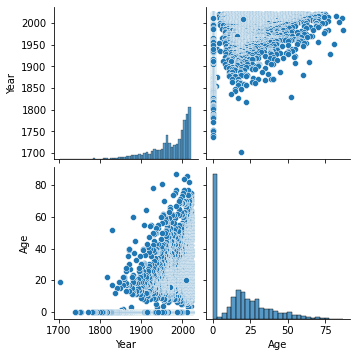

In [211]:
# Because the only numeric columns are the Year and Age categories instead of
#    running a pairplot on the (sharks df) I will run it on the (dates df) because 
#    the BC dates and other dates before 1677 have already been filtered out
# Downside is that additional data was also removed when the (dates df) Date column was
#    converted to Datetime format. It erased the dates that did not include day/month/year
sns.pairplot(dates);
# In order to get better results visual for the Age column I will need to filter out
#    the zeros or use a median or mean to fill. currently the zeros make up 35% of
#    the (dates df) which is fairly substantial to filter out for modeling, but will work 
#    well to filter them out for the sake of visualization

In [204]:
# filtering out the data that's prior to 1900
# try checking the zeros separately
# check the highest concentration of age groups as well

yr1900_d = dates['Year'] >= 1900
age0_1900_d = (dates['Age'] == 0) & yr1900_d
print('dates df > 1900:', len(dates[yr1900_d]))
print('Percetage:', round(age0_1900_d.sum()/len(dates[yr1900_d]), 3))
print('Total 0 values:', age0_1900_d.sum())
# 35% of this data contains a 0 value in the age column

dates df > 1900: 5343
Percetage: 0.35
Total 0 values: 1869


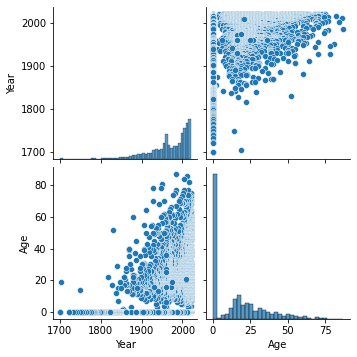

In [207]:
# curious about the (sharks df) because there 691 more rows of data than the (dates df)
# the data that did not conform to the datetime format remain in this dataset
# filtering out data before the year 1677 so the data is based on the same "cutoff" 
#    years as the (dates df) 

yr1677_s = sharks['Year'] >= 1677

sns.pairplot(sharks[yr1677_s]);
# I will proceed forward with the data from the (sharks df) as it is more complete
# I will use data from the (dates df) if I specifically choose to run analytics based
#    on month or other date specific data

In [208]:
# filtering out the data that's prior to 1900
# try checking the zeros separately
# check the highest concentration of age groups as well

yr1900_s = sharks['Year'] >= 1900
age0_1900_s = (sharks['Age'] == 0) & yr1900_s
print('sharks df > 1900:', len(sharks[yr1900_s]))
print('Percetage:', round(age0_1900_s.sum()/len(yr1900_s),3))
print('Total 0 values:', age0_1900_s.sum())
# 36% of this data contains a 0 value in the age column

sharks df > 1900: 6034
Percetage: 0.36
Total 0 values: 2401


In [212]:
# create a boxplot to show the age and years columns with all the outliers


In [ ]:
# I am interested in which activities are most likely to result in a shark attack
# I will attempt to  clean and then filter the dataset in order to produce a
#    useful visualization
sharks['Activity'].value_counts()

# Machine Learning Models



*   clustering for trends or groups for further analysis
*   predictive models for fatality
*   predictive models for months with attacks (use sharks_dates df)

